# 08. PyTorch Experiment Tracking Exercises

Welcome to the 08. PyTorch Paper Replicating exercises.

Your objective is to write code to satisify each of the exercises below.

Some starter code has been provided to make sure you have all the resources you need.

> **Note:** There may be more than one solution to each of the exercises.

## Resources

1. These exercises/solutions are based on [section 08. PyTorch Paper Replicating](https://www.learnpytorch.io/08_pytorch_paper_replicating/) of the Learn PyTorch for Deep Learning course by Zero to Mastery.
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/tjpW_BY8y3g) (but try the exercises yourself first!).
3. See [all solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

> **Note:** The first section of this notebook is dedicated to getting various helper functions and datasets used for the exercises. The exercises start at the heading "Exercise 1: ...".

### Get various imports and helper functions

The code in the following cells prepares imports and data for the exercises below. They are taken from [08. PyTorch Paper Replicating](https://www.learnpytorch.io/08_pytorch_paper_replicating/).

In [2]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")


[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/nightly/cu113
torch version: 2.4.1+cu121
torchvision version: 0.19.1+cu121


In [3]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Get data

Want to download the data we've been using in PyTorch Paper Replicating: https://www.learnpytorch.io/08_pytorch_paper_replicating/#1-get-data

In [5]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] data/pizza_steak_sushi directory exists, skipping download.


PosixPath('data/pizza_steak_sushi')

In [6]:
# Setup directory paths to train and test images
train_dir = image_path / "train"
test_dir = image_path / "test"

### Preprocess data

Turn images into tensors using same code as PyTorch Paper Replicating section 2.1 and 2.2: https://www.learnpytorch.io/08_pytorch_paper_replicating/#21-prepare-transforms-for-images

In [7]:
# Create image size (from Table 3 in the ViT paper)
IMG_SIZE = 224

# Create transform pipeline manually
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [8]:
# Set the batch size
BATCH_SIZE = 32 # this is lower than the ViT paper but it's because we're starting small

# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # use manually created transforms
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x797ab6b28820>,
 ['pizza', 'steak', 'sushi'])

In [9]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(0))

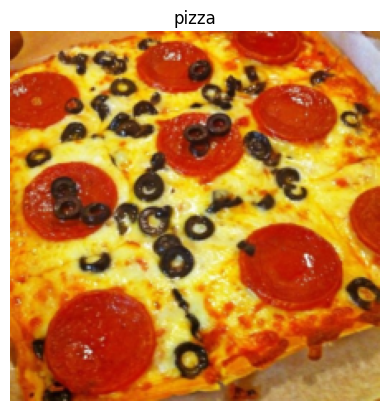

In [10]:
# Plot image with matplotlib
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False);

## 1. Replicate the ViT architecture we created with in-built [PyTorch transformer layers](https://pytorch.org/docs/stable/nn.html#transformer-layers).

* You'll want to look into replacing our `TransformerEncoderBlock()` class with [`torch.nn.TransformerEncoderLayer()`](https://pytorch.org/docs/stable/generated/torch.nn.TransformerEncoderLayer.html#torch.nn.TransformerEncoderLayer) (these contain the same layers as our custom blocks).
* You can stack `torch.nn.TransformerEncoderLayer()`'s on top of each other with [`torch.nn.TransformerEncoder()`](https://pytorch.org/docs/stable/generated/torch.nn.TransformerEncoder.html#torch.nn.TransformerEncoder).

In [11]:
# TODO: your code
tensor = torch.randn(1, 3, 224, 224)
tensor.shape

torch.Size([1, 3, 224, 224])

In [12]:
conv = nn.Conv2d(3, 768, 16, stride=16)
ten = conv(tensor)
cls = torch.randn(1, 1, 768)
prjt = torch.flatten(ten, start_dim=2).permute(0, 2, 1)
torch.cat((cls, prjt), dim=1).shape

torch.Size([1, 197, 768])

In [13]:
class PatchEmbedding(nn.Module):
    def __init__(self, input_dim, embedding_dim, patch_size):
        super().__init__()
        self.linear_projection = nn.Conv2d(input_dim, embedding_dim, patch_size, stride=patch_size)

    def forward(self, x):
        return torch.flatten(self.linear_projection(x), start_dim=2).permute(0, 2, 1)

class EmbeddingBlock(nn.Module):
    def __init__(self, img_size, input_dim, embedding_dim, patch_size):
        assert img_size % patch_size == 0, f"Image size ({img_size}) must be divisible by patch size ({patch_size})"
        super().__init__()

        self.patch_emb = PatchEmbedding(input_dim, embedding_dim, patch_size)
        self.class_emb = nn.Parameter(torch.randn(1, 1, embedding_dim))
        self.pos_emb = nn.Parameter(torch.randn(img_size**2 // patch_size**2 + 1, embedding_dim))

    def forward(self, x):
        x = self.patch_emb(x)

        batch_size = x.shape[0]
        x = torch.cat((self.class_emb.expand(batch_size, -1, -1), x), dim=1)
        return x + self.pos_emb

In [14]:
b = EmbeddingBlock(224, 3, 768, 16)
b(tensor).shape

torch.Size([1, 197, 768])

In [15]:
class ViT(nn.Module):
    def __init__(self,
                 img_size=224,
                 input_dim=3,
                 embedding_dim=768,
                 patch_size=16,
                 num_transformer_layers=12,
                 mlp_size=3072,
                 num_attn_heads=12,
                 mlp_dropout=0.1,
                 embedding_dropout=0.1,
                 num_classes=3):

        super().__init__()
        self.embedding_block = EmbeddingBlock(img_size, input_dim, embedding_dim, patch_size)

        transformer_layer = nn.TransformerEncoderLayer(d_model=embedding_dim,
                                                       nhead=num_attn_heads,
                                                       dim_feedforward=mlp_size,
                                                       dropout=mlp_dropout,
                                                       activation="gelu",
                                                       batch_first=True,
                                                       norm_first=True)

        self.encoder = nn.TransformerEncoder(transformer_layer, num_layers=num_transformer_layers)
        self.classifier = nn.Sequential(nn.LayerNorm(embedding_dim),
                                        nn.Linear(embedding_dim, num_classes))

    def forward(self, x):
        x = self.encoder(self.embedding_block(x))
        return self.classifier(x[:, 0])

In [15]:
vit = ViT()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [ ]:
summary(model=vit,
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
ViT (ViT)                                     [32, 3, 224, 224]    [32, 3]              --                   True
├─EmbeddingBlock (embedding_block)            [32, 3, 224, 224]    [32, 197, 768]       152,064              True
│    └─PatchEmbedding (patch_emb)             [32, 3, 224, 224]    [32, 196, 768]       --                   True
│    │    └─Conv2d (linear_projection)        [32, 3, 224, 224]    [32, 768, 14, 14]    590,592              True
├─TransformerEncoder (encoder)                [32, 197, 768]       [32, 197, 768]       --                   True
│    └─ModuleList (layers)                    --                   --                   --                   True
│    │    └─TransformerEncoderLayer (0)       [32, 197, 768]       [32, 197, 768]       7,087,872            True
│    │    └─TransformerEncoderLayer (1)       [32, 197, 768]       [32, 197, 768]  

Let's test if it trains

In [ ]:
from going_modular.going_modular import engine

# Setup the optimizer to optimize our ViT model parameters using hyperparameters from the ViT paper
optimizer = torch.optim.Adam(params=vit.parameters(),
                             lr=3e-3, # Base LR from Table 3 for ViT-* ImageNet-1k
                             betas=(0.9, 0.999), # default values but also mentioned in ViT paper section 4.1 (Training & Fine-tuning)
                             weight_decay=0.3) # from the ViT paper section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k

# Setup the loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()

# Set the seeds
set_seeds()

# Train the model and save the training results to a dictionary
results = engine.train(model=vit,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.9243 | train_acc: 0.3555 | test_loss: 4.9811 | test_acc: 0.2604
Epoch: 2 | train_loss: 2.5164 | train_acc: 0.2891 | test_loss: 2.2444 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.4230 | train_acc: 0.4609 | test_loss: 1.4803 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.2223 | train_acc: 0.2930 | test_loss: 1.3715 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.1656 | train_acc: 0.2930 | test_loss: 1.2311 | test_acc: 0.2604
Epoch: 6 | train_loss: 1.1739 | train_acc: 0.2891 | test_loss: 1.2669 | test_acc: 0.1979
Epoch: 7 | train_loss: 1.2633 | train_acc: 0.2734 | test_loss: 1.2283 | test_acc: 0.1979
Epoch: 8 | train_loss: 1.1218 | train_acc: 0.2812 | test_loss: 1.1823 | test_acc: 0.2604
Epoch: 9 | train_loss: 1.1465 | train_acc: 0.4297 | test_loss: 1.0158 | test_acc: 0.5417
Epoch: 10 | train_loss: 1.2778 | train_acc: 0.2617 | test_loss: 1.4462 | test_acc: 0.2604


It works!

## 2. Turn the custom ViT architecture we created into a Python script, for example, `vit.py`.

* You should be able to import an entire ViT model using something like`from vit import ViT`.
* We covered the art of turning code cells into Python scrips in [05. PyTorch Going Modular](https://www.learnpytorch.io/05_pytorch_going_modular/).


In [16]:
# TODO: your code
from vit import ViTScript
vit = ViTScript()

summary(model=vit,
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
ViTScript (ViTScript)                         [32, 3, 224, 224]    [32, 3]              --                   True
├─EmbeddingBlock (embedding_block)            [32, 3, 224, 224]    [32, 197, 768]       152,064              True
│    └─PatchEmbedding (patch_emb)             [32, 3, 224, 224]    [32, 196, 768]       --                   True
│    │    └─Conv2d (linear_projection)        [32, 3, 224, 224]    [32, 768, 14, 14]    590,592              True
├─TransformerEncoder (encoder)                [32, 197, 768]       [32, 197, 768]       --                   True
│    └─ModuleList (layers)                    --                   --                   --                   True
│    │    └─TransformerEncoderLayer (0)       [32, 197, 768]       [32, 197, 768]       7,087,872            True
│    │    └─TransformerEncoderLayer (1)       [32, 197, 768]       [32, 197, 768]  

## 3. Train a pretrained ViT feature extractor model (like the one we made in [08. PyTorch Paper Replicating section 10](https://www.learnpytorch.io/08_pytorch_paper_replicating/#10-bring-in-pretrained-vit-from-torchvisionmodels-on-same-dataset)) on 20% of the pizza, steak and sushi data like the dataset we used in [07. PyTorch Experiment Tracking section 7.3](https://www.learnpytorch.io/07_pytorch_experiment_tracking/#73-download-different-datasets)
* See how it performs compared to the EffNetB2 model we compared it to in [08. PyTorch Paper Replicating section 10.6](https://www.learnpytorch.io/08_pytorch_paper_replicating/#106-save-feature-extractor-vit-model-and-check-file-size).

In [17]:
# TODO: your code
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip",
                           destination="pizza_steak_sushi_20")
image_path

[INFO] Did not find data/pizza_steak_sushi_20 directory, creating one...
[INFO] Downloading pizza_steak_sushi_20_percent.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip...
[INFO] Unzipping pizza_steak_sushi_20_percent.zip data...


PosixPath('data/pizza_steak_sushi_20')

In [44]:
weights = torchvision.models.ViT_B_16_Weights.DEFAULT
weights.transforms()

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [45]:
pretrained_vit = torchvision.models.vit_b_16(weights=weights)

In [46]:
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False

set_seeds()
pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)

In [47]:
summary(model=pretrained_vit,
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 3]              768                  Partial
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    (590,592)            False
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              False
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [32, 

In [36]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=weights.transforms(),
    batch_size=BATCH_SIZE
)

In [37]:
from going_modular.going_modular import engine

# Setup the optimizer to optimize our ViT model parameters using hyperparameters from the ViT paper
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(),
                             lr=3e-3, # Base LR from Table 3 for ViT-* ImageNet-1k
                             betas=(0.9, 0.999), # default values but also mentioned in ViT paper section 4.1 (Training & Fine-tuning)
                             weight_decay=0.3) # from the ViT paper section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k

# Setup the loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()

# Set the seeds
set_seeds()

# Train the model and save the training results to a dictionary
results = engine.train(model=pretrained_vit,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5213 | train_acc: 0.8417 | test_loss: 0.0917 | test_acc: 0.9812
Epoch: 2 | train_loss: 0.1444 | train_acc: 0.9604 | test_loss: 0.0965 | test_acc: 0.9756
Epoch: 3 | train_loss: 0.1232 | train_acc: 0.9792 | test_loss: 0.0920 | test_acc: 0.9812
Epoch: 4 | train_loss: 0.0981 | train_acc: 0.9854 | test_loss: 0.1012 | test_acc: 0.9812
Epoch: 5 | train_loss: 0.1005 | train_acc: 0.9875 | test_loss: 0.1003 | test_acc: 0.9875
Epoch: 6 | train_loss: 0.1350 | train_acc: 0.9521 | test_loss: 0.0964 | test_acc: 0.9875
Epoch: 7 | train_loss: 0.1170 | train_acc: 0.9750 | test_loss: 0.1056 | test_acc: 0.9875
Epoch: 8 | train_loss: 0.1314 | train_acc: 0.9812 | test_loss: 0.0947 | test_acc: 0.9750
Epoch: 9 | train_loss: 0.1300 | train_acc: 0.9458 | test_loss: 0.0986 | test_acc: 0.9812
Epoch: 10 | train_loss: 0.1055 | train_acc: 0.9812 | test_loss: 0.0872 | test_acc: 0.9938


Vision Transformer performs much better than EffNetB2

| **Model** | **Model size (MB)** | **Test loss** | **Test accuracy** |
| ----- | ----- | ----- | ------ |
| EffNetB2 | 29 | ~0.3906 | ~0.9384 |
| ViT | 327 | ~0.0872 | ~0.9938 |

## 4. Try repeating the steps from excercise 3 but this time use the "`ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1`" pretrained weights from [`torchvision.models.vit_b_16()`](https://pytorch.org/vision/stable/models/generated/torchvision.models.vit_b_16.html#torchvision.models.vit_b_16).
* Note: ViT pretrained with SWAG weights has a minimum input image size of (384, 384), though this is accessible in the weights `.transforms()` method.

In [38]:
# TODO: your code
weights = torchvision.models.ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1
weights.transforms()

ImageClassification(
    crop_size=[384]
    resize_size=[384]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [39]:
pretrained_vit = torchvision.models.vit_b_16(weights=weights)

In [40]:
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False

set_seeds()
pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)

In [41]:
summary(model=pretrained_vit,
        input_size=(32, 3, 384, 384), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 384, 384]    [32, 3]              768                  Partial
├─Conv2d (conv_proj)                                         [32, 3, 384, 384]    [32, 768, 24, 24]    (590,592)            False
├─Encoder (encoder)                                          [32, 577, 768]       [32, 577, 768]       443,136              False
│    └─Dropout (dropout)                                     [32, 577, 768]       [32, 577, 768]       --                   --
│    └─Sequential (layers)                                   [32, 577, 768]       [32, 577, 768]       --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 577, 768]       [32, 577, 768]       (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 577, 768]       [32, 

In [42]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=weights.transforms(),
    batch_size=BATCH_SIZE
)

In [43]:
from going_modular.going_modular import engine

# Setup the optimizer to optimize our ViT model parameters using hyperparameters from the ViT paper
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(),
                             lr=3e-3, # Base LR from Table 3 for ViT-* ImageNet-1k
                             betas=(0.9, 0.999), # default values but also mentioned in ViT paper section 4.1 (Training & Fine-tuning)
                             weight_decay=0.3) # from the ViT paper section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k

# Setup the loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()

# Set the seeds
set_seeds()

# Train the model and save the training results to a dictionary
results = engine.train(model=pretrained_vit,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4319 | train_acc: 0.9167 | test_loss: 0.0033 | test_acc: 1.0000
Epoch: 2 | train_loss: 0.0424 | train_acc: 0.9875 | test_loss: 0.0133 | test_acc: 1.0000
Epoch: 3 | train_loss: 0.0153 | train_acc: 0.9979 | test_loss: 0.0044 | test_acc: 1.0000
Epoch: 4 | train_loss: 0.0137 | train_acc: 0.9979 | test_loss: 0.0103 | test_acc: 1.0000
Epoch: 5 | train_loss: 0.0168 | train_acc: 1.0000 | test_loss: 0.0149 | test_acc: 1.0000
Epoch: 6 | train_loss: 0.0186 | train_acc: 1.0000 | test_loss: 0.0128 | test_acc: 1.0000
Epoch: 7 | train_loss: 0.0173 | train_acc: 1.0000 | test_loss: 0.0111 | test_acc: 1.0000
Epoch: 8 | train_loss: 0.0218 | train_acc: 1.0000 | test_loss: 0.0209 | test_acc: 1.0000
Epoch: 9 | train_loss: 0.0231 | train_acc: 0.9958 | test_loss: 0.0139 | test_acc: 1.0000
Epoch: 10 | train_loss: 0.0201 | train_acc: 0.9979 | test_loss: 0.0144 | test_acc: 1.0000


# 5. Our custom ViT model architecture closely mimics that of the ViT paper, however, our training recipe misses a few things.
* Research some of the following topics from Table 3 in the ViT paper that we miss and write a sentence about each and how it might help with training:
    * **ImageNet-21k pretraining**
    * **Learning rate warmup**
    * **Learning rate decay**
    * **Gradient clipping**

In [ ]:
# TODO: your explanations of the above terms

- **ImageNet-21k pretraining** - bigger dataset on pretraining leads to better generalisation, and thus a better performance on transfer learning.
- **Learning rate warmup** - it prevents instability in the early stages of training, and makes a smooth transition from lower to higher learning rates
- **Learning rate decay** - as the weights approach optimum, smaller updates are needed or the optimal values may be "overshooted"
- **Gradient clipping** - gradients are clipped to a maximum or minimum treshold, this is used to prevent exploding and diminishing gradients which otherwise could destabilize or even break the training.